### Background

If you are new to the study of differential equations, it can be helpful to do a quick background read on [the definition of ordinary differential equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation). We define an ordinary differential equation as an equation which describes the way that a variable $u$ changes, that is

$$u' = f(u,p,t)$$

where $p$ are the parameters of the model, $t$ is the time variable, and $f$ is the nonlinear model of how $u$ changes. The initial value problem also includes the information about the starting value:

$$u(t_0) = u_0$$

Together, if you know the starting value and you know how the value will change with time, then you know what the value will be at any time point in the future. This is the intuitive definition of a differential equation.

### First Model: Exponential Growth

Our first model will be the canonical exponential growth model. This model says that the rate of change is proportional to the current value, and is this:

$$u' = au$$

where we have a starting value $u(0)=u_0$. Let's say we put 1 dollar into Bitcoin which is increasing at a rate of $98\%$ per year. Then calling now $t=0$ and measuring time in years, our model is:

$$u' = 0.98u$$

and $u(0) = 1.0$. We encode this into Julia by noticing that, in this setup, we match the general form when

```julia
f(u,p,t) = 0.98u
```

with $u_0 = 1.0$. If we want to solve this model on a time span from `t=0.0` to `t=1.0`, then we define an `ODEProblem` by specifying this function `f`, this initial condition `u0`, and this time span as follows:

In [5]:
using DifferentialEquations, Plots, Distributions, LaTeXStrings

In [5]:
tspan = [0,1]

2-element Vector{Int64}:
 0
 1

In [6]:
f(u,p,t) = 0.98u
u0 = 1.0
# tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Int64. In-place: false
timespan: (0, 1)
u0: 1.0

In [9]:
sol = solve(prob)
# the first string means if the solution converges to a success or not 
# then the solution tells us that we got a fourth order interpolation continuously in time between five different time 
# steps. The solver needed only five steps to converge 

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

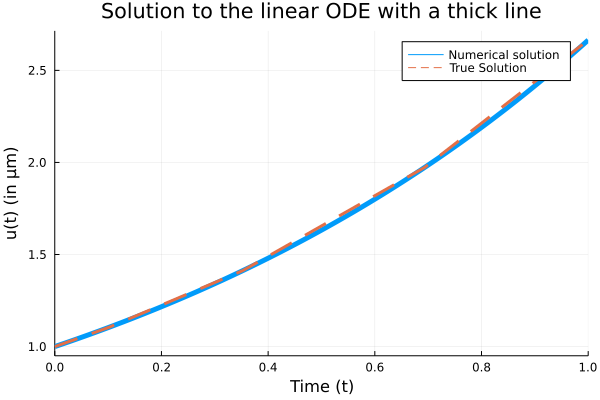

In [10]:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="Numerical solution")
plot!(sol.t, t->1.0*exp(0.98t),lw=3,ls=:dash,label="True Solution")
# where the syntax t->function(t) defines a kind of lambda function evaluated then in sol.t vector

An interesting thing is that by default the solution is a contiinuous function. If we check the print out indeed:

In [11]:
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

We see that it says that the solution has a order changing interpolation. The default algorithm automatically switches between methods in order to handle all types of problems. For non-stiff equations (like the one we are solving), it is a continuous function of 4th order accuracy. We can call the solution as a function of time `sol(t)`.
For example we can get the value of sol at $t = 0.45$ by writing:

In [8]:
sol(0.45)

1.5542610480554593

#### Controlling the Solver

The most useful options are the tolerances `abstol` and `reltol`. These tell the internal adaptive time stepping engine how precise of a solution you want. Generally, `reltol` is the relative accuracy while `abstol` is the accuracy when `u` is near zero. These tolerances are local tolerances and thus are not global guarantees. However, a good rule of thumb is that the total solution accuracy is 1-2 digits less than the relative tolerances. Thus for the defaults `abstol=1e-6` and `reltol=1e-3`, you can expect a global accuracy of about 1-2 digits. If we want to get around 6 digits of accuracy, we can use the commands:

In [9]:
sol = solve(prob, abstol = 1e-8, reltol = 1e-8)
# it takes more steps of course but as we are going to see the actual solution is closer to the exact one

retcode: Success
Interpolation: specialized 7th order lazy interpolation, specialized 3rd order "free" stiffness-aware interpolation
t: 9-element Vector{Float64}:
 0.0
 0.04127492324135852
 0.14679917846877366
 0.28631546412766684
 0.4381941361169628
 0.6118924038903762
 0.7985658554978359
 0.9993515629474041
 1.0
u: 9-element Vector{Float64}:
 1.0
 1.0412786454705882
 1.1547261252949712
 1.3239095703537043
 1.5363819257509728
 1.8214894687485153
 2.1871395278205243
 2.662763602290661
 2.664456241933517

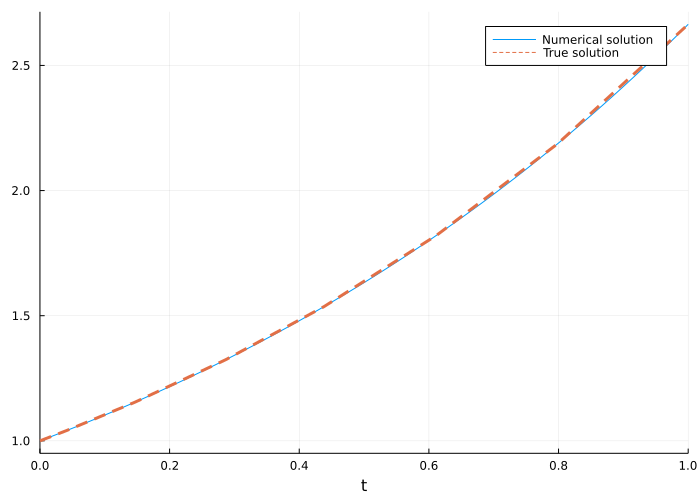

In [10]:
plot(sol, label = "Numerical solution")
plot!(sol.t, t -> 1.0*exp(0.98t), lw = 3, ls = :dash, label = "True solution", size = (700,500))

Another common option is to use `saveat` to make the solver save at specific time points. For example, if we want the solution at an even grid of `t=0.1k` for integers `k`, we would use the command:

In [11]:
sol = solve(prob, saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Float64}:
 1.0
 1.102962785129292
 1.2165269512238264
 1.341783821227542
 1.4799379510586803
 1.6323162070542367
 1.8003833264979396
 1.9857565541587578
 2.190215812799762
 2.4157257420847684
 2.664456142481423

Notice that when `saveat` is used the continuous output variables are no longer saved and thus `sol(t)`, the interpolation, is only first order. We can save at an uneven grid of points by passing a collection of values to `saveat`. For example:

In [12]:
sol = solve(prob,saveat=[0.2,0.7,0.9])

retcode: Success
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
 0.2
 0.7
 0.9
u: 3-element Vector{Float64}:
 1.2165269512238264
 1.9857565541587578
 2.4157257420847684

If we need to reduce the amount of saving, we can also turn off the continuous output directly via `dense=false`:

In [13]:
sol = solve(prob,dense=false)

retcode: Success
Interpolation: 1st order linear
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

and to turn off all intermediate saving we can use `save_everystep=false`:

In [14]:
sol = solve(prob,save_everystep=false)

retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
 0.0
 1.0
u: 2-element Vector{Float64}:
 1.0
 2.664456142481423

If we want to solve and only save the final value, we can even set `save_start=false`.
Note that similarly on the other side there is `save_end=false`.

In [15]:
sol = solve(prob, save_start = false, save_end = false)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 4-element Vector{Float64}:
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 4-element Vector{Float64}:
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

#### Choosing Solver Algorithms

There is no best algorithm for numerically solving a differential equation. When you call `solve(prob)`, DifferentialEquations.jl makes a guess at a good algorithm for your problem, given the properties that you ask for (the tolerances, the saving information, etc.). However, in many cases you may want more direct control. A later notebook will help introduce the various *algorithms* in DifferentialEquations.jl, but for now let's introduce the *syntax*.

The most crucial determining factor in choosing a numerical method is the stiffness of the model. Stiffness is roughly characterized by a Jacobian `f` with large eigenvalues. That's quite mathematical, and we can think of it more intuitively: if you have big numbers in `f` (like parameters of order `1e5`), then it's probably stiff. Or, as the creator of the MATLAB ODE Suite, Lawrence Shampine, likes to define it, if the standard algorithms are slow, then it's stiff. We will go into more depth about diagnosing stiffness in a later tutorial, but for now note that if you believe your model may be stiff, you can hint this to the algorithm chooser via `alg_hints = [:stiff]`.

In [16]:
sol = solve(prob,alg_hints=[:stiff])

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 8-element Vector{Float64}:
 0.0
 0.05653299582822294
 0.17270731152826024
 0.3164602871490142
 0.5057500493966304
 0.7292242404177713
 0.9912979258615463
 1.0
u: 8-element Vector{Float64}:
 1.0
 1.0569657840332976
 1.1844199383303913
 1.3636037723365293
 1.6415400217287892
 2.0434492526679535
 2.6418267183869157
 2.6644526430975066

Stiff algorithms have to solve implicit equations and linear systems at each step so they should only be used when required.

If we want to choose an algorithm directly, you can pass the algorithm type after the problem as `solve(prob,alg)`. For example, let's solve this problem using the `Tsit5()` algorithm, and just for show let's change the relative tolerance to `1e-6` at the same time:

In [17]:
sol = solve(prob,Tsit5(),reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 10-element Vector{Float64}:
 0.0
 0.028970819746309166
 0.10049147151547619
 0.19458908698515082
 0.3071725170882264
 0.43945422364535414
 0.5883435127954693
 0.7524873686506214
 0.929302166760152
 1.0
u: 10-element Vector{Float64}:
 1.0
 1.0287982807225062
 1.1034941463604806
 1.2100931078233779
 1.3512486174374865
 1.5382803540589605
 1.7799346368836082
 2.090571809615733
 2.486102253568992
 2.6644562434913373

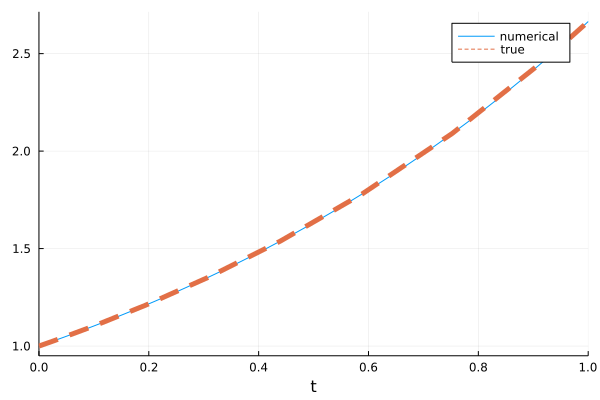

In [18]:
plot(sol, label = "numerical")
plot!(sol.t, t -> exp(0.98t), lw = 5, ls = :dash, label = "true")

### Systems of ODEs: The Lorenz Equation

Now let's move to a system of ODEs. The [Lorenz equation](https://en.wikipedia.org/wiki/Lorenz_system) is the famous "butterfly attractor" that spawned chaos theory. It is defined by the system of ODEs:

$$
\begin{align}
\frac{dx}{dt} &= \sigma (y - x)\\
\frac{dy}{dt} &= x (\rho - z) -y\\
\frac{dz}{dt} &= xy - \beta z
\end{align}
$$

To define a system of differential equations in DifferentialEquations.jl, we define our `f` as a vector function with a vector initial condition. Thus, for the vector `u = [x,y,z]'`, we have the derivative function:

In [19]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

Notice here we used the in-place format which writes the output to the preallocated vector `du`. For systems of equations the in-place format is faster. We use the initial condition $u_0 = [1.0,0.0,0.0]$ as follows:

In [20]:
u0 = [1.0,0.0,0.0]

3-element Vector{Float64}:
 1.0
 0.0
 0.0

Lastly, for this model we made use of the parameters `p`. We need to set this value in the `ODEProblem` as well. For our model we want to solve using the parameters $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$, and thus we build the parameter collection:

In [21]:
p = (10,28,8/3) # we could also make this an array, or any other type!

(10, 28, 2.6666666666666665)

Now we generate the `ODEProblem` type. In this case, since we have parameters, we add the parameter values to the end of the constructor call. Let's solve this on a time span of `t=0` to `t=100`:


In [22]:
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1289-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624087100077666
   0.009058076582749423
   0.016956470605311864
   0.027689959227781235
   0.04185635103821218
   0.060240410627700816
   0.0836854113984534
   0.11336499269451543
   0.14862181409827
   0.18703978025370946
   ⋮
  99.3397852599881
  99.40421692882006
  99.4725041528708
  99.5412045549744
  99.6085310903818
  99.67192934036703
  99.72954041869967
  99.78291962638104
  99.84176034083528
  99.90666445162192
  99.98069072555015
 100.0
u: 1289-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.001046162539761

The same solution handling features apply to this case. Thus `sol.t` stores the time points and `sol.u` is an array storing the solution at the corresponding time points.

However, there are a few extra features which are good to know when dealing with systems of equations. First of all, `sol` also acts like an array. `sol[i]` returns the solution at the `i`th time point.

In [23]:
sol.t[10],sol[10]

(0.0836854113984534, [1.0888638157267199, 2.0523265628455114, 0.07402573450924264])

Additionally, the solution acts like a matrix where `sol[j,i]` is the value of the `j`th variable at time `i`:

In [24]:
sol[2,10]

2.0523265628455114

We can get a real matrix by performing a conversion:

In [25]:
A = Array(sol)

3×1289 Matrix{Float64}:
 1.0  0.999643     0.996105    0.969359     …  0.506309  0.977464  1.16793
 0.0  0.000998805  0.0109654   0.0897706       0.943588  1.87211   2.25241
 0.0  1.78143e-8   2.14696e-6  0.000143802     9.47862   7.84926   7.49689

This is the same as sol, i.e. `sol[i,j] = A[i,j]`, but now it's a true matrix. Plotting will by default show the time series for each variable:

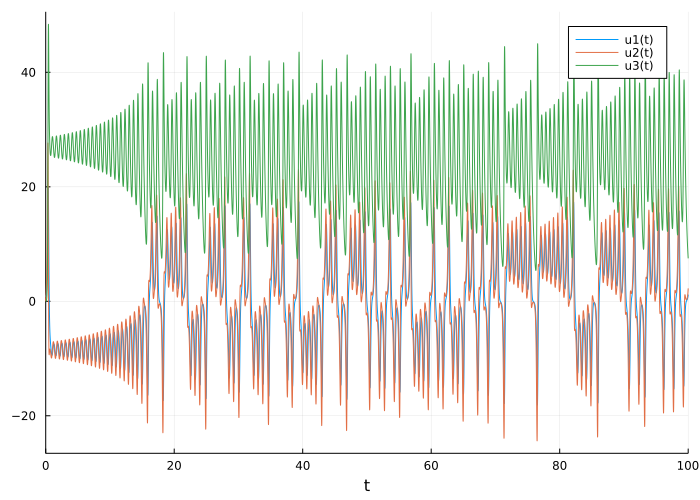

In [26]:
plot(sol, size = (700,500))

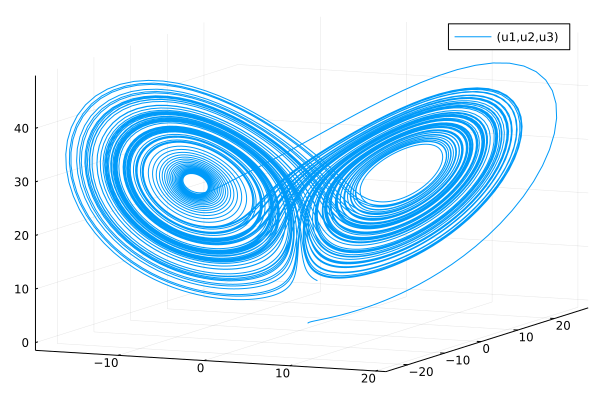

In [27]:
plot(sol, vars=(1,2,3))
# in vars "0" is the variable time therefore we could just use vars = (0,2) for representing a time series plot with the
# second variable  

In [14]:
using ModelingToolkit, LinearAlgebra

The model that describes the evolution of both species and resources is the following:
$$
\dot{m_{\sigma}} = m_{\sigma}\left(\sum_{i=1}^{N_R}v_{i}\alpha_{\sigma i}r_i(c_{i}) - q_{\sigma}\right) \ \ \ \ \  \sigma = 1, \dots, N_S, \\
\dot{c_i} = s_i - \sum_{\sigma = 1}^{N_S} m_{\sigma} \alpha_{\sigma i}r_i(c_i) \ \ \ \ \ i = 1, \dots, N_R,
$$

I would like first of all to implement this system of equations with the modeling toolkit package and the differentialequations one. Here is a simple translation of the model into Euler method of numerical integration:


```python
q = np.random.uniform(0,0.1,ns) 
v = np.random.uniform(0,0.5,nr)
s = np.random.uniform(0,1,nr)

sol = np.zeros((N + 1, ns+nr))
sol[0,:] = 1
# setting initial conditions to one for both consumers and resources 

for n in range(N):
    sol[n+1,:ns] = sol[n,:ns] + dt*sol[n,:ns]*(np.dot(alpha,sol[n,ns:]*v) - q)
    sol[n+1,ns:] = sol[n,ns:] + dt*sol[n,ns:]*(s - np.dot(sol[n,ns:],np.dot(alpha.T,sol[n,:ns])))
```

In [16]:
# Define some variables
# Same as t, σ, ρ, β = [Variable(s)(t; known=true) for s in [:t, :σ, :ρ, :β]]
@parameters t q v s α
# Same as x, y, z = [Variable(s)(t) for s in [:x, :y, :z]]
@variables m(t) c(t)
# Same as D = Differential(t)
@derivatives D'~ t

# Define equations (system of ODEs)
eqs = [D(m) ~ m.*(α*(v.*c) - q),
       D(c) ~ (s - m*(transpose(α)*c))]

2-element Vector{Equation}:
 Differential(t)(m(t)) ~ (v*α*c(t) - q)*m(t)
 Differential(t)(c(t)) ~ s - α*c(t)*m(t)

In [17]:
de = ODESystem(eqs, name = :mysystem)
mcarthur = ODEFunction(de, [m,c], [q,v,s,α])

(::ODEFunction{true, ModelingToolkit.var"#f#387"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1, :ˍ₋arg2, :t), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0xab10c974, 0xe8962aad, 0xbec10a3e, 0xd58a553b, 0x0f9e19ef)}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋out, :ˍ₋arg1, :ˍ₋arg2, :t), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0xa3a7f8ee, 0x80294128, 0xcd6dcccf, 0x4e523915, 0xbc65cfea)}}, UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Vector{Symbol}, Symbol, ModelingToolkit.var"#377#generated_observed#394"{Bool, ODESystem, Dict{Any, Any}}, Nothing}) (generic function with 7 methods)

In [19]:
u0 = [0.1,1]
q = rand(Uniform(0,0.1),1)
v = rand(Uniform(0,0.5),1)
s = rand(Uniform(0,1),1)
α = rand(Uniform(0,0.5),1)
# p = (q,v,s,α)
p = (0.1,0.5,1,0.5)
tspan = (0.0,1000.0)
prob = ODEProblem(mcarthur, u0, tspan, p)
sol = solve(prob, alg_hints=[:stiff]);

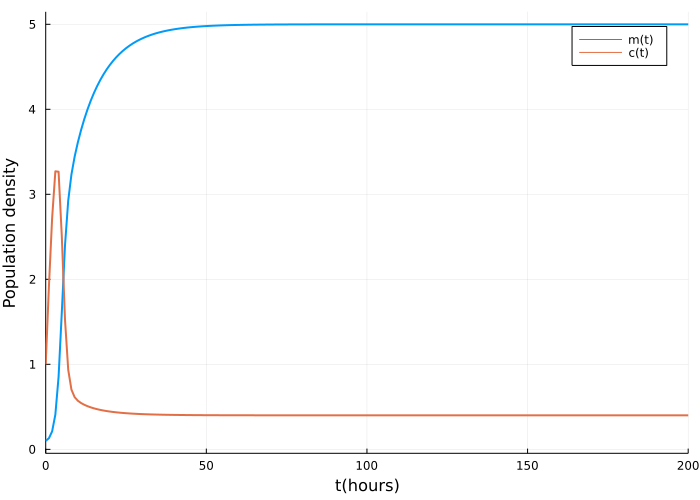

In [20]:
plot(sol, lw = 2, size = (700,500), xlims = (0,200), ylabel = "Population density", xlabel = "t(hours)")

In [2]:
function mcarthur!(dx, x, p, t)
    ns,nr,q,v,s,α,ω = p
    dx[1:ns] = x[1:ns].*(α*(v.*x[(ns+1):(ns+nr)]) - q)
    dx[(ns+1):(ns+nr)] = (s - ω.*x[(ns+1):(ns+nr)] - x[(ns+1):(ns+nr)].*(transpose(α)*x[1:ns]))
end 

mcarthur! (generic function with 1 method)

In [11]:
# Parameters
ns = 10
nr = 5
q = rand(Uniform(0,1),ns)
v = rand(Uniform(0,1),nr)
s = rand(Uniform(0,1),nr)
α = rand(Uniform(0,0.5),ns,nr)
ω = rand(Uniform(0,0.5),nr)
p = [ns,nr,q,v,s,α,ω]

# Initial conditions
m0 = ones(ns)*1
m0 ./= sum(m0)
c0 = ones(nr)*1
c0 ./= sum(c0)
u0 = vcat(m0,c0)
# vcat flattens the array of initial conditions in order to have an 8-D vector as a solution of the ODEProblem 

# Time span vector
tspan = (0.,100.)

# Definition of the problem 
prob = ODEProblem(mcarthur!, u0, tspan, p);
sol = solve(prob,Tsit5(),reltol=1e-7);

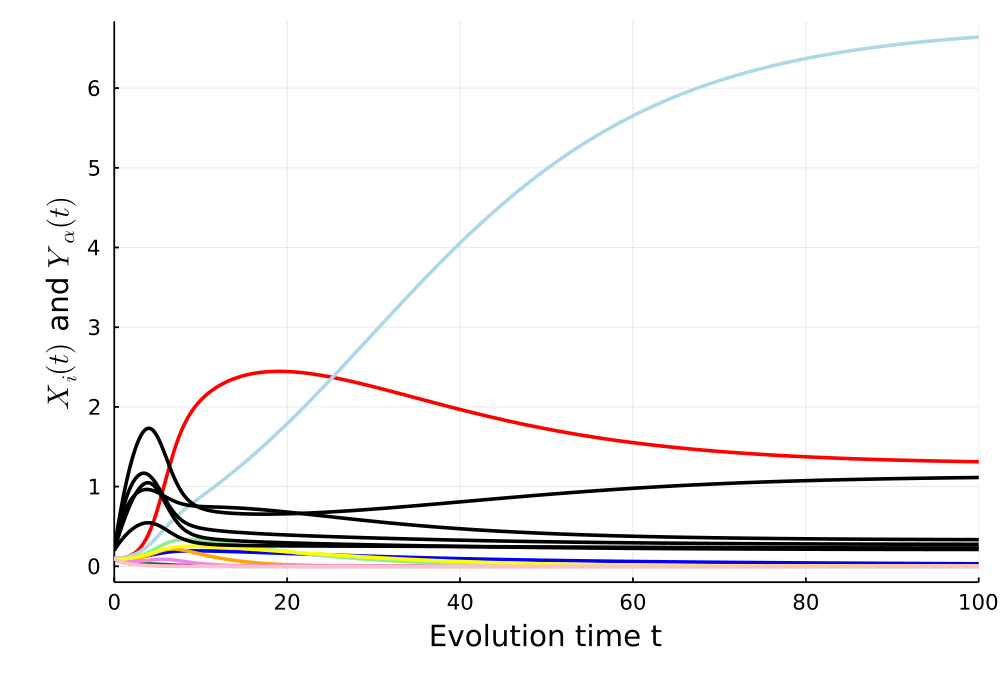

In [14]:
clist = reshape([:red,:green,:blue,:orange,:purple,:violet,:lightblue,:lightgreen,:yellow,:pink,[:black for i in 1:5]...],1,15)
plot(sol,vars=1:15,linecolor=clist,size=(1000,700),legend=false,linewidth=2,thickness_scaling=1.8,ylabel=L"X_i(t)"*" and "*L"Y_{\alpha}(t)",
     xlabel="Evolution time t")
# savefig("chem_example.png")

In [27]:
solution = [sol.u[i][1:ns] for i in 1:length(sol.u)];

solution_vector= [[solution[i][j] for i in 1:length(solution)] for j in 1:ns]

solution_matrix = Matrix{Float64}(undef,length(sol.u),ns)

for i in 1:length(sol.u), j in 1:ns 
    solution_matrix[i,j] = solution_vector[j][i]
end

In [36]:
plot(sol.t,solution_matrix,size=(800,500),ylabel=L"X_i(t)",xlabel="Cycle duration (t)",linewidth=2.5,legend=false,color=:blues,line_z=solution_matrix)
# savefig("cr_model.png")

Trying to implement the consumer-proteome-resource model with the ```DifferentialEquations``` package in Julia. The main equations are:

If $\eta_{\sigma i} = k_i^n/\rho_{\sigma}$, $\gamma_{\sigma i} = k_i^n/k_{\sigma}^t$ and $r_i(c_i) = \frac{c_i}{c_i + K_i}$

$$
\dot{m_{\sigma}} = m_{\sigma}\left(\sum_{i = 1}^{N_R} \eta_{\sigma i} r_i(c_i)\varphi_{\sigma i} - q_{\sigma}\right) \\
\dot{c_i} = s_i - \xi_i r_i(c_i)\sum_{\sigma = 1}^{N_S} \varphi_{\sigma i} m_{\sigma} \\
\dot{\varphi_{\sigma i}} = \varphi_{\sigma i} \left[\frac{\eta_{\sigma i} r_i(c_i)}{\tau_{\sigma}} - \frac{(1 + \gamma_{\sigma i} r_i(c_i))}{\sum_{k = 1}^{N_R} \varphi_{\sigma k}(1 + \gamma_{\sigma k} r_k(c_k))^2} \sum_{j = 1}^{N_R} \varphi_{\sigma j} \left( \frac{\eta_{\sigma j} r_j(c_j)}{\tau_{\sigma}} \left(1 + \gamma_{\sigma j} r_j(c_j)\right) + \gamma_{\sigma j} r_j(c_j) \frac{K_j}{(c_j + K_j)^2} \dot{c_j} \right) \right]
$$


In [25]:
# na = [CartesianIndex()]  # for "newaxis"

In [12]:
function eta_sigmai(ns,nr)
    tmp = zeros(ns,nr)
    for σ in 1:ns
        for i in 1:nr
            tmp[σ,i] = kn[i]/ρ[σ]
        end
    end
    return tmp
end

function r(c,K)
    c./(c+K)
end

function gamma_sigmai(ns,nr)
    tmp1 = zeros(ns,nr)
    for σ in 1:ns
        for i in 1:nr
            tmp1[σ,i] = kn[i]/kt[σ]
        end
    end
    return tmp1
end;

In [13]:
function cpr!(dx, x, p, t)
    q,ρ,s,ξ,kn,kt,K,τ,η1,γ1 = p

    for i in 1:nr
        dx[1:ns,i] = x[1:ns,i].*((η1.*x[(ns+nr+1):(ns+nr+ns),:])*r(x[(ns+1):(ns+nr),1],K) - q)
        dx[(ns+1):(ns+nr),i] = (s - ξ.*r(x[(ns+1):(ns+nr),1],K).*(transpose(x[(ns+nr+1):(ns+nr+ns),:])*x[1:ns,i]))
    end

    # in questo caso dovrei fare un reshape malefico della matrice phi ovvero delle soluzioni x[(ns+nr+1):(ns+nr+ns),:]
    
    # dx[1:ns] = x[1:ns].*((η1.*)*r(x[(ns+1):(ns+nr)],K) - q)
    # dx[(ns+1):(ns+nr)] = (s - ξ.*r(x[(ns+1):(ns+nr)],K).*(transpose()*x[1:ns,i]))

    # now let's write in matricial form the r.h.s of the phi differential equation and after that we can reparametrize
    # its component in order to have a big vector of solutions x that contains also phi rows and columns
    

    # another idea could be to make all the ode system in matricial form meaning adding one dimension to specie 
    # and resources stacking three columns of the same array for both m,m,m and c,c,c. In this way initial conditions
    # will be a big matrix with ns+nr+ns rows and nr columns 
    
    first = [η1[σ,i]*r(x[(ns+1):(ns+nr),1],K)[i]/τ[σ] for σ in 1:ns, i in 1:nr]
    second_num = [1 + γ1[σ,i]*r(x[(ns+1):(ns+nr),1],K)[i] for σ in 1:ns, i in 1:nr]
    second_den = sum(x[(ns+nr+1):(ns+nr+ns),:].*[(1 + γ1[σ,i]*r(x[(ns+1):(ns+nr),1],K)[i])*(1 + γ1[σ,i]*r(x[(ns+1):(ns+nr),1],K)[i]) for σ in 1:ns, i in 1:nr], dims = 2)
    second = [second_num[σ,i]/second_den[σ] for σ in 1:ns, i in 1:nr] 
    third = sum(x[(ns+nr+1):(ns+nr+ns),:].*[x[(ns+1):(ns+nr),1][i]*(γ1[σ,i]*r(x[(ns+1):(ns+nr),1],K)[i]*K[i]/(x[(ns+1):(ns+nr),1][i] + K[i]))/(dx[(ns+1):(ns+nr),1][i] + K[i]) for σ in 1:ns, i in 1:nr], dims = 2)
    fourth = [second[σ,i]*third[i] for σ in 1:ns, i in 1:nr]
    dx[(ns+nr+1):(ns+nr+ns),:] = x[(ns+nr+1):(ns+nr+ns),:].*(first - fourth) 

    # first = [η1[σ,i]*r(x[(ns+1):(ns+nr)],K)[i]/τ[σ] for σ in 1:ns, i in 1:nr]
    # second_num = [1 + γ1[σ,i]*r(x[(ns+1):(ns+nr)],K)[i] for σ in 1:ns, i in 1:nr]
    # second_den = sum(x[(ns+nr+1):(ns+nr+ns),:].*[(1 + γ1[σ,i]*r(x[(ns+1):(ns+nr)],K)[i])*(1 + γ1[σ,i]*r(x[(ns+1):(ns+nr)],K)[i]) for σ in 1:ns, i in 1:nr], dims = 2)
    # second = [second_num[σ,i]/second_den[σ] for σ in 1:ns, i in 1:nr] 
    # third = sum(x[(ns+nr+1):(ns+nr+ns),:].*[x[(ns+1):(ns+nr)][i]*(γ1[σ,i]*r(x[(ns+1):(ns+nr)],K)[i]*K[i]/(x[(ns+1):(ns+nr)][i] + K[i]))/(dx[(ns+1):(ns+nr)][i] + K[i]) for σ in 1:ns, i in 1:nr], dims = 2)
    # fourth = [second[σ,i]*third[i] for σ in 1:ns, i in 1:nr]

    # dx[(ns+nr+1):(ns+nr+ns)] = x[(ns+nr+1):(ns+nr+ns)].*(first - fourth) 
end 

cpr! (generic function with 1 method)

In [114]:
# Parameters 
ns = 10
nr = 3
q = rand(Uniform(0.01,0.02), ns) 
ρ = rand(Uniform(0.6,0.8), ns) 
s = rand(Uniform(5000,20000), nr) 
ξ = rand(Uniform(1000,1500), nr)  
kn = rand(Uniform(2,5), nr) 
kt = rand(Uniform(1,4), ns)  
K = rand(Uniform(500,1000), nr)
τ = rand(Uniform(100,500), ns)
Φ = rand(Uniform(0.45,0.55), ns)
η1 = eta_sigmai(ns,nr)
γ1 = gamma_sigmai(ns,nr)
p = (q,ρ,s,ξ,kn,kt,K,τ,η1,γ1)

# Initial conditions
m0 = rand(Uniform(1,5), ns)
c0 = rand(Uniform(5000, 15000), nr)
phi0 = rand(Uniform(1,5), ns,nr)
scale = (sum(phi0, dims = 2) + (gamma_sigmai(ns,nr).*phi0)*r(c0,K))./Φ
phi0 = phi0./scale # ATTENZIONE ALLA CONDIZIONE SUPPLEM INFO 
m0_matr = reshape(vcat(m0,m0,m0),ns,3)
c0_matr = reshape(vcat(c0,c0,c0),nr,3)
u0 = vcat(m0,c0,reshape(phi0,ns*nr));
u0_matr = vcat(m0_matr, c0_matr, phi0);

tspan = (0.,1000.);

# Definition of the problem 
prob = ODEProblem(cpr!, u0_matr, tspan, p);

In [115]:
# reshape(phi0, 30) # julia reshapa prendendo prima le colonne ovvero scorrendo sugli indici di riga e poi sugli indici di colonna 

In [116]:
sol = solve(prob)#, AutoTsit5(Rosenbrock23()))#, abstol=1e-8, reltol=1e-8);

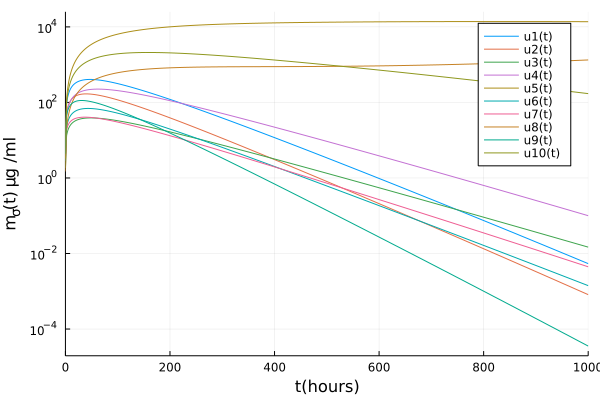

In [113]:
plot(sol, vars = (0,1:10), yaxis = :log, xlabel = "t(hours)", ylabel = "m_{\\sigma}\\(t\\) \\mug /ml")

In this two cells we are trying to filter the solution in order to get just the positive quantities. While in the plot above there are $N$ points since the ```DifferentialEquations``` package interpolates between different instants of time, in the following plot points are as many as the ones evaluated when the program solved the ODEs. It means that it is always suggested to used directly the variable ```sol``` provided by the solver.

In [87]:
solution = [sol.u[i][1:ns] for i in 1:length(sol.u)];

mask = [solution[i] .< 0 for i in 1:length(solution)];

mask1 = findall(i -> sum(i) != 0, mask);

# positivesol = solution[1:mask1[1]-1];
if length(mask1) != 0
    positivesol = solution[1:mask1[1]-1];
    print("")
else 
    positivesol = solution;
    print("")
end

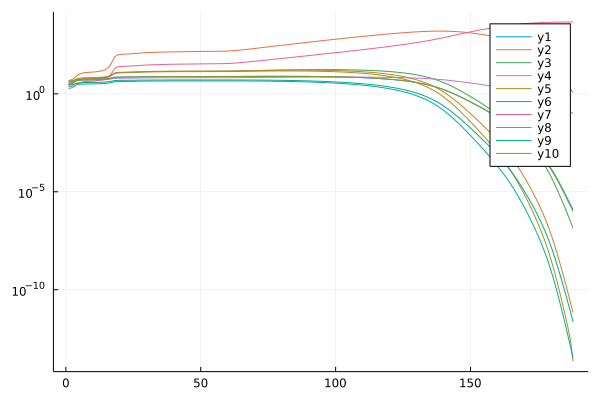

In [88]:
positivesolmat = [positivesol[i][j] for i in 1:length(positivesol), j in 1:ns]

plot(positivesolmat, yaxis=:log)